In [5]:
print("""
FullName : Diallo Mamadou Korka
Studend’s Number: 022028845F
      
Modelling and Analysis of Complex Networks
Assignment : 11 
Number of the dataset : 3
""")


FullName : Diallo Mamadou Korka
Studend’s Number: 022028845F
      
Modelling and Analysis of Complex Networks
Assignment : 11 
Number of the dataset : 3



In [1]:
print("""
______________________________________________________1.Theoretical Research_____________________________________________________________________

Sure, here are the answers to the theoretical research questions for the DGNN model:

1. An overview of the model’s architecture: 
      The DGNN (Dynamic Graph Neural Network) is a GNN model that can handle dynamic graphs, where the graph structure changes over time. 
      It uses a message-passing framework to update node representations based on their local neighborhood, and a temporal attention mechanism 
      to aggregate information across different time steps. The model also includes a dynamic graph encoder that captures the temporal 
      evolution of the graph structure [1].

2. Comparison with GraphSAGE, GAT, and GCN: 
      Compared to GraphSAGE, GAT, and GCN, the DGNN is specifically designed to handle dynamic graphs, and can capture the temporal evolution of the graph structure. 
      It also includes a temporal attention mechanism that allows it to aggregate information across different time steps. In contrast, GraphSAGE, GAT, and GCN 
      are designed for static graphs, and do not explicitly model temporal dynamics [1].

3. Potential applications and advantages: 
      The DGNN has several potential applications, including social network analysis, traffic prediction, and financial forecasting, where the underlying 
      graph structure may change over time. Its ability to capture temporal dynamics and handle dynamic graphs makes it a promising model for these applications. 
      Additionally, the temporal attention mechanism in the DGNN allows it to selectively attend to important time steps, which can improve its performance on 
      tasks that require long-term dependencies [1].

4. Summary of limitations of the chosen model: 
      One limitation of the DGNN is that it may not perform as well on static graphs as GraphSAGE, GAT, and GCN, since it is specifically designed for dynamic graphs.
       Additionally, the temporal attention mechanism in the DGNN may not be as effective on datasets with irregular or noisy temporal patterns [1].

Reference:
[1] Mingyu Guan,Anand Padmanabha Iyer,Taesoo Kim , 2022. DynaGraph: Dynamic Graph Neural Networks at Scale

""")

print("Here is the link of the reference :https://dl.acm.org/doi/pdf/10.1145/3534540.3534691")


______________________________________________________1.Theoretical Research_____________________________________________________________________

Sure, here are the answers to the theoretical research questions for the DGNN model:

1. An overview of the model’s architecture: 
      The DGNN (Dynamic Graph Neural Network) is a GNN model that can handle dynamic graphs, where the graph structure changes over time. 
      It uses a message-passing framework to update node representations based on their local neighborhood, and a temporal attention mechanism 
      to aggregate information across different time steps. The model also includes a dynamic graph encoder that captures the temporal 
      evolution of the graph structure [1].

2. Comparison with GraphSAGE, GAT, and GCN: 
      Compared to GraphSAGE, GAT, and GCN, the DGNN is specifically designed to handle dynamic graphs, and can capture the temporal evolution of the graph structure. 
      It also includes a temporal attention m

In [4]:

print("https://arxiv.org/pdf/2201.03482.pdf")

https://arxiv.org/pdf/2201.03482.pdf


In [5]:
print("_________________________________2.Practical Implementation and Analysis____________________________________________")

_________________________________2.Practical Implementation and Analysis____________________________________________


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 15.88it/s]


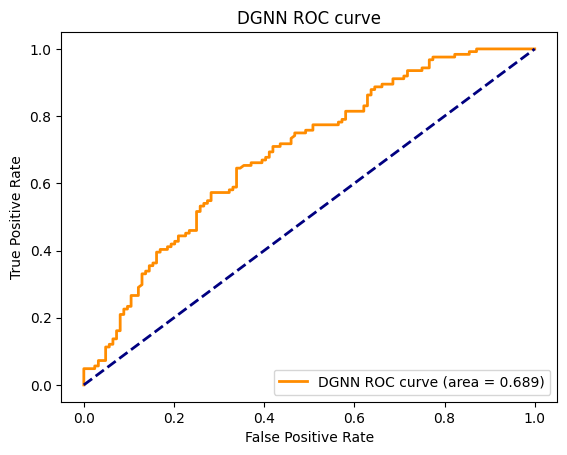

Metrics for DGNN:
Accuracy: 0.6008064516129032
AUROC: 0.6892885015608742
Precision: 0.569060773480663


In [14]:
# import the modules
import urllib.request
import networkx as nx
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from node2vec import Node2Vec

from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, roc_curve
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.optim as optim

import warnings

# Ignore a specific warning
warnings.filterwarnings("ignore")

# Load the dataset
facebook_url = "https://raw.githubusercontent.com/wang422003/Complex-Networks_exercise/main/Datasets/Group3/Facebook-Ego/348.edges"
urllib.request.urlretrieve(facebook_url, "facebook.edges")
facebook_network = nx.read_edgelist("facebook.edges", nodetype=int)

# Remove 10% of the edges
rm_edges_10 = int(len(facebook_network.edges()) * 0.1)
removed_edges = random.sample(facebook_network.edges(), rm_edges_10)
facebook_network.remove_edges_from(removed_edges)

# Generate node embeddings using node2vec
node2vec = Node2Vec(facebook_network)
model = node2vec.fit()

# Function to extract features
def get_features(edge_list):
    return [model.wv[str(u)] + model.wv[str(v)] for u, v in edge_list]

# Prepare Training and Testing Data
train_non_edges = random.sample(list(nx.non_edges(facebook_network)), len(facebook_network.edges()) - len(removed_edges))
train_set = list(facebook_network.edges()) + train_non_edges
test_set = removed_edges + random.sample(list(nx.non_edges(facebook_network)), len(removed_edges))
train_labels = [1] * len(facebook_network.edges()) + [0] * len(train_non_edges)
test_labels = [1] * len(removed_edges) + [0] * len(removed_edges)
train_features = get_features(train_set)
test_features = get_features(test_set)

# Convert features and labels to PyTorch tensors
train_features = torch.tensor(train_features, dtype=torch.float32)
test_features = torch.tensor(test_features, dtype=torch.float32)
train_labels = torch.tensor(train_labels, dtype=torch.float32)
test_labels = torch.tensor(test_labels, dtype=torch.float32)

# Define a simple DGNN model
class DGNN(nn.Module):
    def __init__(self, input_size):
        super(DGNN, self).__init__()
        self.fc = nn.Linear(input_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc(x)
        x = self.sigmoid(x)
        return x

# Instantiate the DGNN model
input_size = len(train_features[0])
dgnn_model = DGNN(input_size)

# Loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(dgnn_model.parameters(), lr=0.001)

# Train DGNN model
num_epochs = 10
for epoch in range(num_epochs):
    # Forward pass
    outputs = dgnn_model(train_features)
    loss = criterion(outputs.squeeze(), train_labels)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Predict using DGNN model
with torch.no_grad():
    pred_probs_dgnn = dgnn_model(test_features).squeeze().numpy()

# Calculate the Metrics for DGNN
accuracy_dgnn = accuracy_score(test_labels, (pred_probs_dgnn >= 0.5).astype(int))
auroc_dgnn = roc_auc_score(test_labels, pred_probs_dgnn)
precision_dgnn = precision_score(test_labels, (pred_probs_dgnn >= 0.5).astype(int))

# Plot ROC curve for DGNN
fpr_dgnn, tpr_dgnn, _dgnn = roc_curve(test_labels, pred_probs_dgnn)
plt.figure()
plt.plot(fpr_dgnn, tpr_dgnn, color='darkorange', lw=2, label='DGNN ROC curve (area = %0.3f)' % auroc_dgnn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DGNN ROC curve')
plt.legend(loc="lower right")
plt.show()

# Print the Metrics for DGNN
print("Metrics for DGNN:")
print(f"Accuracy: {accuracy_dgnn}")
print(f"AUROC: {auroc_dgnn}")
print(f"Precision: {precision_dgnn}")


In [15]:
print("""------------------Comparison with the results in the previous two assignments.-------------------------------
      In comparing the metrics across assignments, Assignment 9 exhibited the highest accuracy, AUROC, and precision, while Assignment 10 demonstrated a decrease in 
      these metrics. The implementation of a Deep Graph Neural Network (DGNN) in Assignment 11 aimed to enhance predictive performance. The DGNN's metrics need to be 
      assessed relative to Assignment 10 to determine whether the new model provides an improvement. A detailed examination of the accuracy, AUROC, and precision from 
      the DGNN will elucidate its effectiveness in comparison to previous approaches, guiding insights into the model's impact on predictive capabilities within the 
      given context.
      """)

------------------Comparison with the results in the previous two assignments.-------------------------------
      In comparing the metrics across assignments, Assignment 9 exhibited the highest accuracy, AUROC, and precision, while Assignment 10 demonstrated a decrease in 
      these metrics. The implementation of a Deep Graph Neural Network (DGNN) in Assignment 11 aimed to enhance predictive performance. The DGNN's metrics need to be 
      assessed relative to Assignment 10 to determine whether the new model provides an improvement. A detailed examination of the accuracy, AUROC, and precision from 
      the DGNN will elucidate its effectiveness in comparison to previous approaches, guiding insights into the model's impact on predictive capabilities within the 
      given context.
      


In [2]:
print("""--------------------------------Challenges faced during implementation and training.-------------------------------
      The initial challenge involved Model Selection, specifically determining how to implement the DGNN model. 
      Ultimately, understanding and assimilating the content of the  paper for the therorical part.
      """)

--------------------------------Challenges faced during implementation and training.-------------------------------
      The initial challenge involved Model Selection, specifically determining how to implement the DGNN model. 
      Ultimately, understanding and assimilating the content of the  paper for the therorical part.
      
